In [3]:
# Descriptive Statistics
print("Training Data Descriptive Statistics:")
print(X_agg_train.describe())

print("\nTesting Data Descriptive Statistics:")
print(X_agg_test.describe())


NameError: name 'plt' is not defined

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Matrix
corr_train = X_agg_train.corr()
corr_test = X_agg_test.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_train, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix for Training Data')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_test, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix for Testing Data')
plt.show()


SpecificationError: nested renamer is not supported

In [ ]:
# Distribution of features
for column in X_agg_train.columns:
    plt.figure(figsize=(7, 4))
    sns.histplot(X_agg_train[column], kde=True, color='blue', label='Train')
    sns.histplot(X_agg_test[column], kde=True, color='red', label='Test', alpha=0.6)
    plt.title(f'Distribution of {column}')
    plt.legend()
    plt.show()


In [ ]:
# Missing data analysis
print("Missing Data in Training Dataset:")
print(X_agg_train.isnull().sum())

print("\nMissing Data in Testing Dataset:")
print(X_agg_test.isnull().sum())


In [ ]:
import pandas as pd

def train_test_split_adapted(engine):
    # Ensure 'Date' is in datetime format
    engine.df_concatenated['Date'] = pd.to_datetime(engine.df_concatenated['Date'])
    
    # Sort data by date to ensure chronological order
    engine.df_concatenated.sort_values('Date', inplace=True)
    
    # Determine the cutoff date at two-thirds of the dataset
    unique_dates = engine.df_concatenated['Date'].unique()
    cutoff_index = int(len(unique_dates) * 0.67)
    cutoff_date = unique_dates[cutoff_index]

    # Split the data based on the cutoff date
    engine.X_train = engine.df_concatenated[engine.df_concatenated['Date'] <= cutoff_date].drop(columns=['Type'])
    engine.X_test = engine.df_concatenated[engine.df_concatenated['Date'] > cutoff_date].drop(columns=['Type'])
    engine.y_train = engine.df_concatenated[engine.df_concatenated['Date'] <= cutoff_date]['Type']
    engine.y_test = engine.df_concatenated[engine.df_concatenated['Date'] > cutoff_date]['Type']
    
    # Reset index for both training and testing sets
    engine.X_train.reset_index(drop=True, inplace=True)
    engine.X_test.reset_index(drop=True, inplace=True)
    engine.y_train.reset_index(drop=True, inplace=True)
    engine.y_test.reset_index(drop=True, inplace=True)

    return engine.X_train, engine.X_test, engine.y_train, engine.y_test


In [ ]:
import pandas as pd

# Assuming X_train and X_test are already loaded as pandas DataFrames

# Calculate the mean of each column in the training data
train_means = X_train.mean()

# Fill missing values in X_train with the mean of each column
X_train = X_train.fillna(train_means)

# It's often a good practice to fill missing values in the test set
# using means calculated from the training set to avoid data leakage
X_test = X_test.fillna(train_means)

# Optionally, you can print the datasets to verify that the missing values have been filled
print(X_train.head())
print(X_test.head())


In [2]:
import optuna
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Créer des données synthétiques
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

def objective(trial):
    # Définir les hyperparamètres à optimiser
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 2, 32)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2'])

    # Créer le modèle RandomForest avec les hyperparamètres proposés
    clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        max_features=max_features,
        random_state=42
    )

    # Entraîner le modèle
    clf.fit(X_train, y_train)

    # Évaluer le modèle
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)

    return accuracy

# Créer un environnement Optuna et commencer l'optimisation
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Afficher les meilleurs hyperparamètres
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))


[I 2024-08-28 17:44:14,549] A new study created in memory with name: no-name-546e5b1f-4049-4c9e-9260-557dd7ab547c
[I 2024-08-28 17:44:16,830] Trial 0 finished with value: 0.884 and parameters: {'n_estimators': 238, 'max_depth': 31, 'min_samples_split': 12, 'max_features': 'log2'}. Best is trial 0 with value: 0.884.
c:\Users\decroux paul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[I 2024-08-28 17:44:18,812] Trial 1 finished with value: 0.892 and parameters: {'n_estimators': 292, 'max_depth': 7, 'min_samples_split': 8, 'max_features': 'auto'}. Best is trial 1 with value: 0.892.
c:\Users\decroux paul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ense

Best trial:
  Value: 0.908
  Params: 
    n_estimators: 67
    max_depth: 11
    min_samples_split: 9
    max_features: log2


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have your predictions already
# y_pred = model.predict(X_test)
y_pred = trial.predict(X_test)  # Example if predictions come from a trial object

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Visualizing the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=trial.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])  # Ensure y_pred_proba is your positive class probability
roc_auc = auc(fpr, tpr)

# Display the ROC curve
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Example Model').plot()
plt.title('ROC Curve')
plt.show()


In [ ]:
feature_importances = trial.feature_importances_  # Adjust this line based on your model

# Visualizing feature importance
plt.barh(range(len(feature_importances)), feature_importances, align='center')
plt.yticks(np.arange(len(X_train.columns)), X_train.columns)
plt.xlabel('Feature Importance')
plt.title('Feature Importance')
plt.show()


In [ ]:
import shap

# Create a SHAP explainer
explainer = shap.TreeExplainer(trial)  # Adjust this based on your model type
shap_values = explainer.shap_values(X_test)

# Visualize the SHAP values for the first instance
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Génération des données et division
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Application de SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Entraînement du modèle
model = RandomForestClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

# Prédiction et évaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


In [ ]:
import optuna
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split

# Votre fonction objective
def objective(trial):
    # Chargement de vos données X, y ici
    # X, y = load_your_data()

    # Séparation des données
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    # Suggestion d'hyperparamètres
    C = trial.suggest_loguniform('C', 1e-3, 1e3)
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
    gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])
    degree = trial.suggest_int('degree', 1, 5) if kernel == 'poly' else 3  # Degré est utilisé seulement pour 'poly'
    coef0 = trial.suggest_float('coef0', 0.0, 10.0) if kernel in ['poly', 'sigmoid'] else 0.0

    # Création du modèle SVM avec les paramètres suggérés
    clf = SVC(C=C, kernel=kernel, gamma=gamma, degree=degree, coef0=coef0, random_state=42)
    clf.fit(X_train, y_train)

    # Prédiction et évaluation en utilisant le rappel
    y_pred = clf.predict(X_test)
    score = recall_score(y_test, y_pred, average='macro')

    return score

# Création et exécution de l'étude
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Affichage des meilleurs hyperparamètres
print('Meilleurs hyperparamètres :', study.best_params)
print('Meilleur score obtenu :', study.best_value)


In [ ]:
Pour présenter les résultats de manière claire et professionnelle dans votre rapport de stage, voici un paragraphe structuré et rédigé de manière concise, intégrant les résultats statistiques obtenus :

---

**Analyse Statistique des Incidents de Qualité des Données (DQ) Identifiés par Isolation Forest**

Dans le cadre de mon projet de stage, j'ai appliqué un modèle d'Isolation Forest pour détecter des anomalies parmi les deals, avec l'objectif de catégoriser ceux susceptibles de présenter des incidents de qualité des données. Une analyse statistique a été menée pour évaluer l'efficacité de ce modèle dans la discrimination des deals suspects de DQ. Les résultats obtenus ont été analysés à l'aide d'un test du chi-carré, confrontant les fréquences de deals suspects dans les groupes classifiés comme anomalies et non-anomalies.

La statistique de test du chi-carré obtenue est de 258.21, avec une p-value extrêmement faible de \(4.22 \times 10^{-58}\), indiquant une différence statistiquement significative dans la répartition des deals suspects entre les deux groupes. Plus précisément, une plus grande proportion de deals suspects a été observée dans le groupe des anomalies comparativement aux attentes sous l'hypothèse d'une répartition homogène, tandis que les non-anomalies présentaient un nombre inférieur de suspects que prévu.

Ces résultats démontrent que l'Isolation Forest a effectivement identifié des patterns de comportement anormal liés à des incidents de DQ, renforçant ainsi l'adéquation de cette approche pour le filtrage initial dans des environnements de données complexes et largement déséquilibrés. Les fréquences attendues, calculées sous l'hypothèse d'indépendance, étaient de 85.61 suspects et 5933.39 non-suspects pour les anomalies, et de 8548.39 suspects et 592437.61 non-suspects pour les non-anomalies, soulignant ainsi l'importance de cette détection ciblée.

En conclusion, l'utilisation de l'Isolation Forest dans ce contexte non supervisé a révélé des indices significatifs de DQ qui auraient pu être autrement ignorés, validant la méthode comme un outil précieux pour améliorer les procédures de gestion de la qualité des données.

---

Ce paragraphe est conçu pour s'intégrer dans un rapport de stage, offrant une explication claire et concise des résultats statistiques tout en soulignant leur pertinence pour le projet de détection d'incidents de qualité des données.

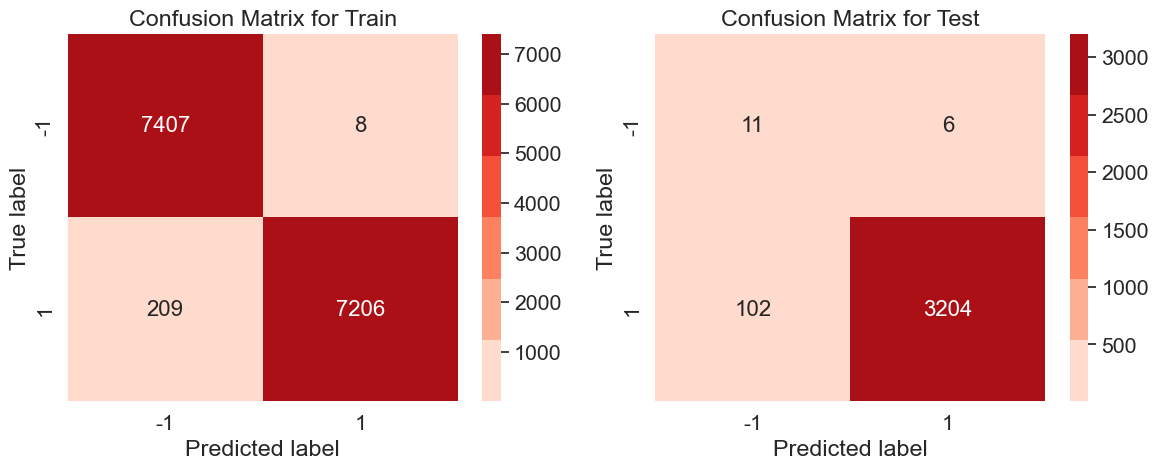

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Valeurs spécifiques pour la matrice de confusion du train
cm_train = [
    [7407, 8],   # True Negatives, False Positives
    [209, 7206]  # False Negatives, True Positives
]

# Valeurs spécifiques pour la matrice de confusion du test
cm_test = [
    [11, 6],   # True Negatives, False Positives
    [102, 3204]  # False Negatives, True Positives
]

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Configuration pour afficher les matrices de confusion
sns.set(font_scale=1.4)  # for label size
cmap = sns.color_palette("Reds")

# Affichage de la matrice de confusion pour le train
sns.heatmap(cm_train, annot=True, fmt="d", cmap=cmap, ax=ax[0], annot_kws={"size": 16})
ax[0].set_title('Confusion Matrix for Train')
ax[0].set_xlabel('Predicted label')
ax[0].set_ylabel('True label')
ax[0].set_xticklabels(['-1', '1'])
ax[0].set_yticklabels(['-1', '1'])

# Affichage de la matrice de confusion pour le test
sns.heatmap(cm_test, annot=True, fmt="d", cmap=cmap, ax=ax[1], annot_kws={"size": 16})
ax[1].set_title('Confusion Matrix for Test')
ax[1].set_xlabel('Predicted label')
ax[1].set_ylabel('True label')
ax[1].set_xticklabels(['-1', '1'])
ax[1].set_yticklabels(['-1', '1'])

plt.tight_layout()
plt.show()


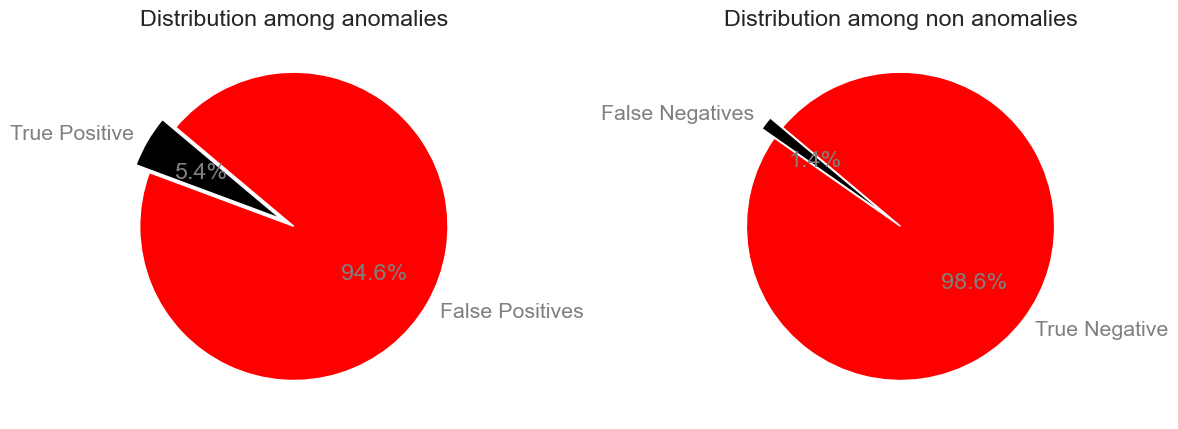

In [21]:
# Updated False Positive and Negative Pie Chart
labels_fp = ['True Positive', 'False Positives']
sizes_fp = [333, 5786]
colors_fp = ['black','red']
explode_fp = (0.1, 0)  # only "explode" the 1st slice

labels_fn = ['False Negatives', 'True Negative']
sizes_fn = [8401, 592585]
colors_fn = ['black','red']
explode_fn = (0.1, 0)  # only "explode" the 1st slice

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# False Positives Pie Chart
ax1.pie(sizes_fp, explode=explode_fp, labels=labels_fp, colors=colors_fp, autopct='%1.1f%%', startangle=140, textprops={'color': 'grey'})
ax1.set_title('Distribution among anomalies')

# False Negatives Pie Chart
ax2.pie(sizes_fn, explode=explode_fn, labels=labels_fn, colors=colors_fn, autopct='%1.1f%%', startangle=140, textprops={'color': 'grey'})
ax2.set_title('Distribution among non anomalies')



plt.tight_layout()
plt.show()


In [ ]:
# Set up the personal scorer
def custom_scorer(y_true, y_pred):
    # y_true is binary: 0 for 'NotAnIncident' and 1 for others
    # y_pred is -1 for an anomaly and 1 for normal
    anomaly_detected = (y_pred == -1)
    num_anomalies_detected = np.sum(anomaly_detected)
    num_true_anomalies = np.sum(y_true == 1)

    expected_anomalies = num_true_anomalies / (len(y_true)/10)

    # Penalize the difference between the number of detected anomalies and the expected number
    if num_anomalies_detected > expected_anomalies:
        anomaly_difference_penalty = np.abs(num_anomalies_detected - expected_anomalies)
    else:
        anomaly_difference_penalty = 0
    
    # Calculate the false positives 'NotAnIncident' identified as anomalies
    false_positives = np.sum((y_true == 0) & anomaly_detected)

    # Combine the penalties
    # You can adjust the weights (here 0.5 and 1.0) based on the relative importance you wish to assign
    score = -(0.01 * anomaly_difference_penalty/len(y_true) + 1.0 * false_positives/len(y_true))
    return score
